In [1]:
!pip install torch

In [2]:
!pip install transformers

In [3]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification


### Load Dataset

In [4]:
import json 
with open('../artifatcs/kaggle (1).json', 'r') as file:
    data = json.load(file)

In [5]:
data

{'username': 'jayathusandanuwan', 'key': 'ea4146d37bfba54116ede5e79797b15b'}

In [6]:
!pip install kaggle

In [7]:
import os
os.environ['KAGGLE_USERNAME'] = data['username']
os.environ['KAGGLE_KEY'] = data['key']

In [8]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [9]:
api.dataset_download_files('deepshah16/song-lyrics-dataset', path='../artifacts2')

In [10]:
import zipfile
with zipfile.ZipFile('../artifacts2/song-lyrics-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('../artifacts2')

In [11]:
song_lyrics_df = pd.read_csv("../artifacts2/csv/ArianaGrande.csv")

### Load Model and Tokenizer

In [12]:
!pip3 install torch torchvision torchaudio

In [13]:
!pip install tensorflow
import tensorflow as tf 


In [14]:
import torch

In [15]:
pip install distutils

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement distutils (from versions: none)
ERROR: No matching distribution found for distutils


In [16]:
import distutils as _distutils
import importlib
import inspect as _inspect

In [17]:
pip install tf-keras

Note: you may need to restart the kernel to use updated packages.


In [18]:
tokenizer = AutoTokenizer.from_pretrained("arpanghoshal/EmoRoBERTa")
model = AutoModelForSequenceClassification.from_pretrained("arpanghoshal/EmoRoBERTa", from_tf=True)

All TF 2.0 model weights were used when initializing RobertaForSequenceClassification.

All the weights of RobertaForSequenceClassification were initialized from the TF 2.0 model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use RobertaForSequenceClassification for predictions without further training.


In [19]:
song_lyrics_df.head(5)

,Artist,Title,Album,Date,Lyric,Year
0,Ariana Grande,"​thank u, next","thank u, next",2018-11-03,thought i'd end up with sean but he wasn't a m...,2018.0
1,Ariana Grande,7 rings,"thank u, next",2019-01-18,yeah breakfast at tiffany's and bottles of bub...,2019.0
2,Ariana Grande,​God is a woman,Sweetener,2018-07-13,you you love it how i move you you love it how...,2018.0
3,Ariana Grande,Side To Side,Dangerous Woman,2016-05-20,ariana grande nicki minaj i've been here all ...,2016.0
4,Ariana Grande,​​no tears left to cry,Sweetener,2018-04-20,right now i'm in a state of mind i wanna be in...,2018.0


In [45]:
song_lyrics_df[["Title", "Artist", "Lyric"]].head(2)

,Title,Artist,Lyric
0,"​thank u, next",Ariana Grande,thought i'd end up with sean but he wasn't a m...
1,7 rings,Ariana Grande,yeah breakfast at tiffany's and bottles of bub...


In [52]:
def predict_emotion(lyric):
    inputs = tokenizer(lyric, return_tensors="pt", truncation=True)
    outputs = model(**inputs)
    predicted_class = torch.argmax(outputs.logits, dim=1).item()
    # Update emotion mapping for 28 emotions
    emotion_mapping = {
        0: "Happy",
        1: "Sad",
        2: "Angry",
        3: "Neutral",
        4: "Energetic",
        5: "Calm",
        6: "Joy",
        7: "Fear",
        8: "Surprise",
        9: "Love",
        10: "Optimistic",
        11: "Pessimistic",
        12: "Anxious",
        13: "Content",
        14: "Caring",
        15: "Bored",
        16: "Excited",
        17: "Apprehensive",
        18: "Nostalgic",
        19: "Amused",
        20: "Confident",
        21: "Grateful",
        22: "Disappointed",
        23: "Determined",
        24: "Appreciative",
        25: "Embarrassed",
        26: "Frustrated",
        27: "Lonely"
    }
    predicted_emotion = emotion_mapping.get(predicted_class, "Unknown")
    return predicted_emotion

In [53]:
song_lyrics_df["predicted_emotion"] = song_lyrics_df["Lyric"].apply(predict_emotion)

In [64]:
print(song_lyrics_df[["predicted_emotion"]])

    predicted_emotion
0               Happy
1            Surprise
2           Nostalgic
3              Lonely
4           Nostalgic
..                ...
303         Nostalgic
304         Confident
305      Apprehensive
306         Energetic
307              Calm

[308 rows x 1 columns]


In [68]:
print(song_lyrics_df[["Artist", "Title", "Album", "Date", "Lyric", "Year", "predicted_emotion"]])

            Artist                                       Title  \
0    Ariana Grande                              ​thank u, next   
1    Ariana Grande                                     7 rings   
2    Ariana Grande                             ​God is a woman   
3    Ariana Grande                                Side To Side   
4    Ariana Grande                      ​​no tears left to cry   
..             ...                                         ...   
303  Ariana Grande  God is a Woman (Excuse me i love you LIVE)   
304  Ariana Grande                                      Magic*   
305  Ariana Grande                                  Right here   
306  Ariana Grande                                     Venuss*   
307  Ariana Grande          One last time_Ariana_Grande_(2014)   

               Album        Date  \
0      thank u, next  2018-11-03   
1      thank u, next  2019-01-18   
2          Sweetener  2018-07-13   
3    Dangerous Woman  2016-05-20   
4          Sweetener  2018-

In [72]:
song_lyrics_df.drop(columns=["Emotion"], inplace=True)

In [73]:
song_lyrics_df

,Artist,Title,Album,Lyric,Year,predicted_emotion
0,Ariana Grande,"​thank u, next","thank u, next",thought i'd end up with sean but he wasn't a m...,2018.0,Happy
1,Ariana Grande,7 rings,"thank u, next",yeah breakfast at tiffany's and bottles of bub...,2019.0,Surprise
2,Ariana Grande,​God is a woman,Sweetener,you you love it how i move you you love it how...,2018.0,Nostalgic
3,Ariana Grande,Side To Side,Dangerous Woman,ariana grande nicki minaj i've been here all ...,2016.0,Lonely
4,Ariana Grande,​​no tears left to cry,Sweetener,right now i'm in a state of mind i wanna be in...,2018.0,Nostalgic
...,...,...,...,...,...,...
303,Ariana Grande,God is a Woman (Excuse me i love you LIVE),NaN,you you love it how i move you love it how i t...,2020.0,Nostalgic
304,Ariana Grande,Magic*,NaN,come back soon when there is lyrics,NaN,Confident
305,Ariana Grande,Right here,NaN,lalalalalalala oooooh lets do what we want th...,NaN,Apprehensive
306,Ariana Grande,Venuss*,NaN,no lyrics for this song come back soon,NaN,Energetic


In [74]:
song_lyrics_df.shape

(308, 6)

In [75]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [76]:
song_lyrics_df

,Artist,Title,Album,Lyric,Year,predicted_emotion
0,Ariana Grande,"​thank u, next","thank u, next",thought i'd end up with sean but he wasn't a match wrote some songs about ricky now i listen and laugh even almost got married and for pete i'm so thankful wish i could say thank you to malcolm 'cause he was an angel pre one taught me love one taught me patience and one taught me pain now i'm so amazing say i've loved and i've lost but that's not what i see so look what i got look what you taught me and for that i say thank you next next thank you next next thank you next i'm so fuckin' grateful for my ex thank you next next thank you next next thank you next next i'm so fuckin' spend more time with my friends i ain't worried 'bout nothin' plus i met someone else we havin' better discussions i know they say i move on too fast but this one gon' last 'cause her name is ari and i'm so good with that so good with that pre she taught me love love she taught me patience patience how she handles pain pain that shit's amazing yeah she's amazing i've loved and i've lost yeah yeah but that's not what i see yeah yeah 'cause look what i've found yeah yeah ain't no need for searching and for that i say thank you next thank you next thank you next thank you next thank you next thank you i'm so fuckin' grateful for my ex thank you next thank you next thank you next said thank you next thank you next next i'm so fuckin' grateful for my ex post thank you next thank you next thank you next i'm so fuckin' one day i'll walk down the aisle holding hands with my mama i'll be thanking my dad 'cause she grew from the drama only wanna do it once real bad gon' make that shit last god forbid something happens least this song is a smash song is a smash pre i've got so much love love got so much patience patience and i've learned from the pain pain i turned out amazing turned out amazing say i've loved and i've lost yeah yeah but that's not what i see yeah yeah 'cause look what i've found yeah yeah ain't no need for searching and for that i say thank you next thank you next thank you next thank you next thank you next i'm so fuckin' grateful for my ex thank you next thank you next thank you next said thank you next thank you next next i'm so fuckin' grateful for my ex post thank you next thank you next thank you next yeah yee thank you next thank you next thank you next yeah yee,2018.0,Happy
1,Ariana Grande,7 rings,"thank u, next",yeah breakfast at tiffany's and bottles of bubbles girls with tattoos who like getting in trouble lashes and diamonds atm machines buy myself all of my favorite things yeah been through some bad shit i should be a sad bitch who woulda thought it'd turn me to a savage rather be tied up with calls and not strings write my own checks like i write what i sing yeah yeah pre my wrist stop watchin' my neck is flossy make big deposits my gloss is poppin' you like my hair gee thanks just bought it i see it i like it i want it i got it yeah i want it i got it i want it i got it i want it i got it i want it i got it you like my hair gee thanks just bought it i see it i like it i want it i got it yep wearing a ring but ain't gon' be no mrs bought matching diamonds for six of my bitches i'd rather spoil all my friends with my riches think retail therapy my new addiction whoever said money can't solve your problems must not have had enough money to solve 'em they say which one i say nah i want all of 'em happiness is the same price as redbottoms pre my smile is beamin' yeah my skin is gleamin' is gleamin' the way it shine i know you've seen it you've seen it i bought a crib just for just for the closet closet both his and hers i want it i got it yeah i want it i got it i want it i got it i want it i got it i want it i got it baby you like my hair gee thanks just bought it oh yeah i see it i like it i want it i got it yep yeah my receipts be lookin' like phone numbers if it ain't money then wrong number black card is my business card the way it be

In [77]:
import matplotlib.pyplot as plt

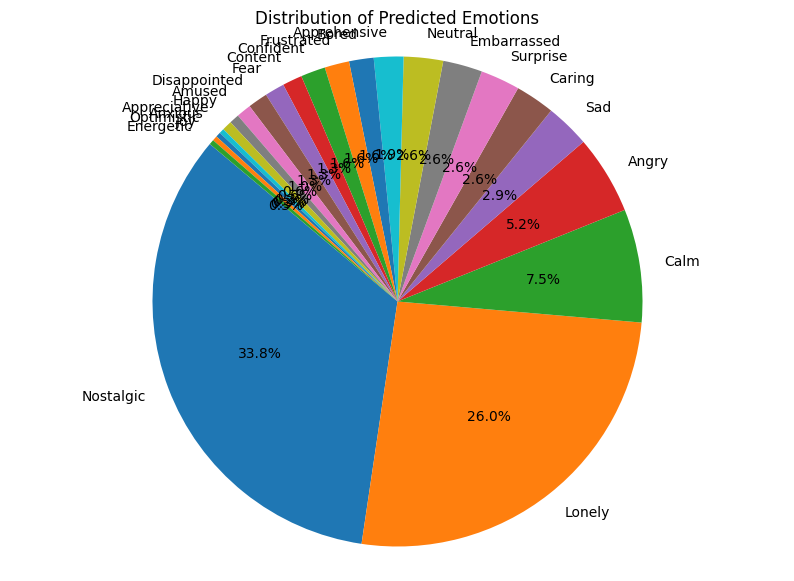

In [78]:
emotion_counts = song_lyrics_df["predicted_emotion"].value_counts()


plt.figure(figsize=(10, 7))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Predicted Emotions')
plt.show()

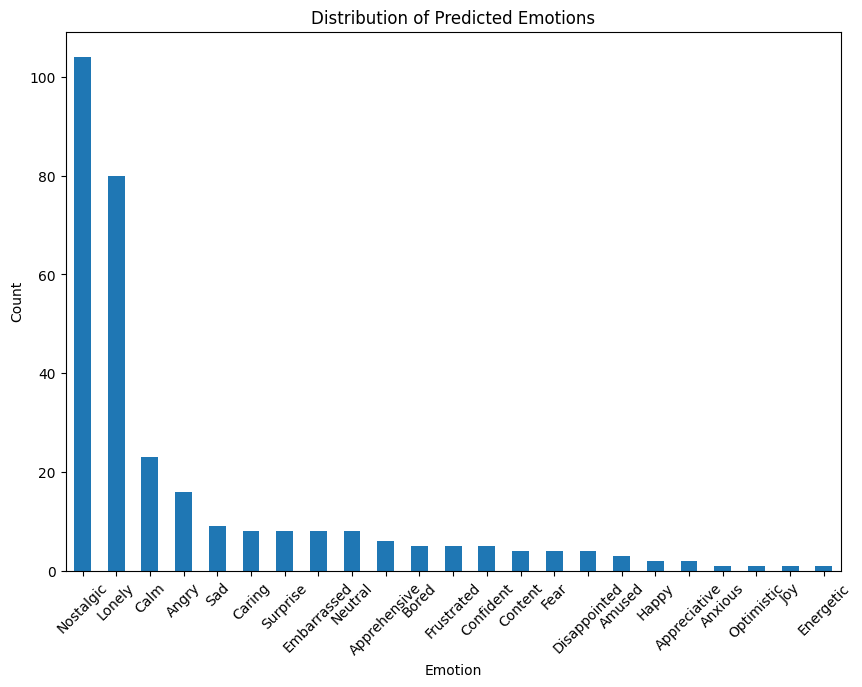

In [79]:
emotion_counts = song_lyrics_df["predicted_emotion"].value_counts()


plt.figure(figsize=(10, 7))
emotion_counts.plot(kind='bar')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Distribution of Predicted Emotions')
plt.xticks(rotation=45)
plt.show()